# IS 304 Homework 5 - Data Analysis
### Max Zhang

I've selected the "Death rates for suicide, by sex, race, Hispanic origin, and age, United States" dataset from Data.gov. This dataset is vital because suicide represents a significant public health concern in the United States, being one of the leading causes of death especially among the younger population. Analyzing patterns across demographic groups can identify at-risk populations and inform targeted prevention strategies.

Research questions that I plan to answer using this dataset:

1. How have suicide rates changed over time in the United States?

2. Are there significant differences in suicide trends between males and females?

In [8]:
# loading and preliminary description of the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Death_rates_for_suicide__by_sex__race__Hispanic_origin__and_age__United_States.csv')
df.head()

,INDICATOR,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG
0,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1950,1,All ages,0.0,13.2,NaN
1,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1960,2,All ages,0.0,12.5,NaN
2,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1970,3,All ages,0.0,13.1,NaN
3,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1980,4,All ages,0.0,12.2,NaN
4,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1981,5,All ages,0.0,12.3,NaN



1. **Dataset Overview**:
   - Unit of Measurement: Deaths per 100,000 resident population (age-adjusted)
   - Time Period: Starting from 1950

2. **Key Metadata Variables**:

   a) **Temporal Information**:
   - `YEAR`: Annual data from 1950 to 2018
   - `YEAR_NUM`: Numerical encoding of years

   b) **Demographic Categories**:
   - `STUB_NAME`: Main categorization method (e.g., Total, Sex, Sex and race, Age)
   - `STUB_LABEL`: Detailed demographic breakdowns
   - `AGE`: 15 distinct age groups including:
     - Specific ranges (10-14, 15-24, 25-44, etc.)
     - Broader categories (65 years and over)
     - "All ages" category

   c) **Measurement Information**:
   - `INDICATOR`: Identifies the type of measurement
   - `UNIT`: Specifies the measurement unit
   - `ESTIMATE`: The actual death rate values
   - `FLAG`: Indicates special cases or data quality notes

3. **Important Demographic Breakdowns**:
   - Gender: Male, Female
   - Race: White, Black or African American, American Indian or Alaska Native, Asian or Pacific Islander
   - Ethnicity: Hispanic or Latino, Not Hispanic or Latino
   - Intersectional categories combining gender, race, and ethnicity

4. **Analytical Potential**:
   This metadata structure allows for:
   - Longitudinal analysis across decades
   - Demographic comparison across multiple dimensions
   - Intersectional analysis of multiple demographic factors
   - Age-specific trend analysis
   - Race and ethnicity-based comparative studies


### RQ 1. How have suicide rates changed over time in the United States?


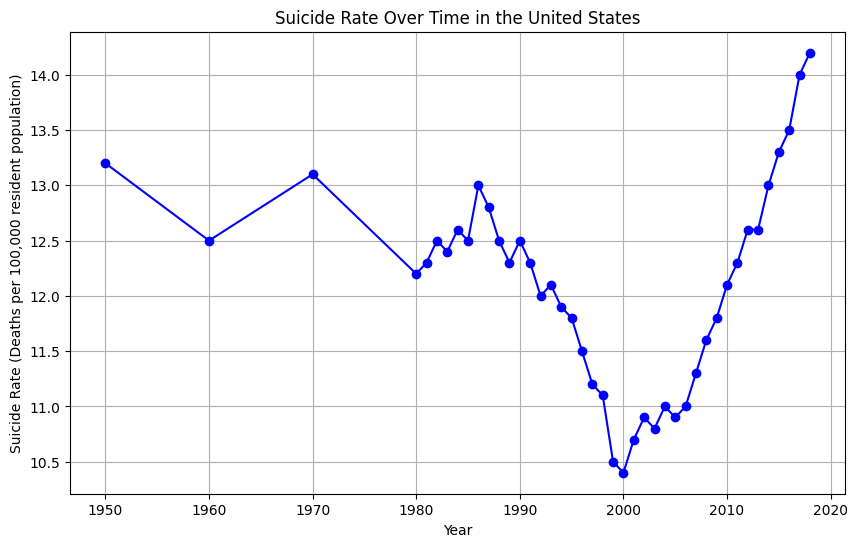

In [13]:
df_allperson = df[(df['STUB_LABEL'] == 'All persons') & (df['UNIT_NUM'] == 1)]
# plot the suicide rate over time
plt.figure(figsize=(10, 6))
plt.plot(df_allperson['YEAR'], df_allperson['ESTIMATE'], marker='o', linestyle='-', color='b')
plt.title('Suicide Rate Over Time in the United States')
plt.xlabel('Year')
plt.ylabel('Suicide Rate (Deaths per 100,000 resident population)')
plt.grid(True)

In [10]:
# calculate mean suicide rate per decade and % change from decade to decade
df_allperson['DECADE'] = df_allperson['YEAR'] // 10 * 10
df_decade = df_allperson.groupby('DECADE').agg({
    'ESTIMATE': 'mean',
    'YEAR': 'first'
}).reset_index()
df_decade['DECADE_CHANGE'] = df_decade['ESTIMATE'].diff()
df_decade['DECADE_CHANGE_PERCENT'] = df_decade['DECADE_CHANGE'] / df_decade['ESTIMATE'] * 100
df_decade

/var/folders/92/8b71n6kj0h33ch61yv1mfqxw0000gn/T/ipykernel_37992/922921889.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_allperson['DECADE'] = df_allperson['YEAR'] // 10 * 10


,DECADE,ESTIMATE,YEAR,DECADE_CHANGE,DECADE_CHANGE_PERCENT
0,1950,13.200000,1950,NaN,NaN
1,1960,12.500000,1960,-0.700000,-5.600000
2,1970,13.100000,1970,0.600000,4.580153
3,1980,12.510000,1980,-0.590000,-4.716227
4,1990,11.690000,1990,-0.820000,-7.014542
5,2000,11.040000,2000,-0.650000,-5.887681
6,2010,13.066667,2010,2.026667,15.510204


The suicide rate in the United States has shown notable fluctuations since 1950, with several distinct patterns across decades. Starting from 13.2 deaths per 100,000 residents in 1950, the rate experienced modest declines in the 1960s (12.5), followed by a slight increase in the 1970s (13.1). The 1980s and 1990s saw a gradual decline, reaching 11.69 in the 1990s and further dropping to 11.04 in the 2000s. However, the most dramatic change occurred in the 2010s, where the rate increased significantly by 15.51% to 13.07 deaths per 100,000 residents - the highest decadal average in the studied period. This recent upward trend represents a concerning reversal of the generally declining or stable patterns observed in previous decades, marking the 2010s as a period of particular concern for public health officials.

This interpretation is supported by both the time series plot showing year-by-year changes and the decade-by-decade analysis presented in the notebook, which reveals that the 2010s experienced the largest percentage increase (+15.51%) compared to any other decade-to-decade change in the dataset.

### RQ 2. Are there significant differences in suicide trends between males and females?

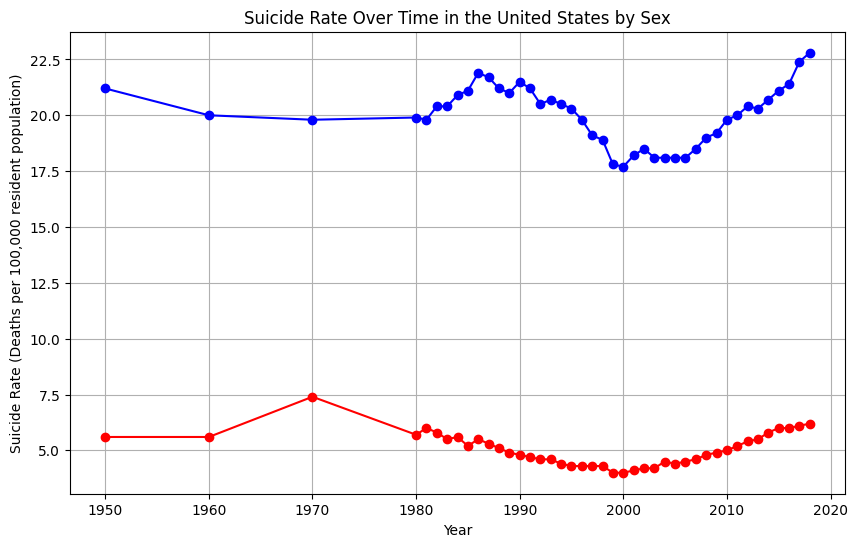

In [15]:

df_male = df[(df['STUB_LABEL'] == 'Male') & (df['UNIT_NUM'] == 1)]
df_female = df[(df['STUB_LABEL'] == 'Female') & (df['UNIT_NUM'] == 1)]
# plot the suicide rate over time for males and females
plt.figure(figsize=(10, 6))
plt.plot(df_male['YEAR'], df_male['ESTIMATE'], marker='o', linestyle='-', color='b', label='Male')
plt.plot(df_female['YEAR'], df_female['ESTIMATE'], marker='o', linestyle='-', color='r', label='Female')
plt.title('Suicide Rate Over Time in the United States by Sex')
plt.xlabel('Year')
plt.ylabel('Suicide Rate (Deaths per 100,000 resident population)')
plt.grid(True)

In [19]:
# compare the mean suicide rate between males and females
# calculate mean suicide rate per decade for males and females
df_male.loc[:, 'DECADE'] = df_male['YEAR'] // 10 * 10
df_male_decade = df_male.groupby('DECADE').agg({
    'ESTIMATE': 'mean',
    'YEAR': 'first'
}).reset_index()

df_female.loc[:, 'DECADE'] = df_female['YEAR'] // 10 * 10
df_female_decade = df_female.groupby('DECADE').agg({
    'ESTIMATE': 'mean',
    'YEAR': 'first'
}).reset_index()

# combine male and female data side by side
df_comparison = pd.DataFrame({
    'DECADE': df_male_decade['DECADE'],
    'Male Rate': df_male_decade['ESTIMATE'],
    'Female Rate': df_female_decade['ESTIMATE'],
    'Difference (M-F)': df_male_decade['ESTIMATE'] - df_female_decade['ESTIMATE'],
    'Male:Female Ratio': df_male_decade['ESTIMATE'] / df_female_decade['ESTIMATE']
}).round(3)

df_comparison


,DECADE,Male Rate,Female Rate,Difference (M-F),Male:Female Ratio
0,1950,21.200,5.600,15.60,3.786
1,1960,20.000,5.600,14.40,3.571
2,1970,19.800,7.400,12.40,2.676
3,1980,20.830,5.460,15.37,3.815
4,1990,20.030,4.430,15.60,4.521
5,2000,18.350,4.420,13.93,4.152
6,2010,20.989,5.689,15.30,3.689


there are substantial and persistent differences in suicide rates between males and females. The data shows that males consistently have markedly higher suicide rates than females across all decades. Looking at the comparison table we can see that:

The absolute difference (M-F) remains large and positive throughout all decades, indicating males consistently die by suicide at higher rates than females

The Male:Female ratio shows that male suicide rates are several times higher than female rates
This gender disparity appears to be a consistent pattern over time, suggesting a persistent structural difference in suicide rates between males and females

This gender gap in suicide rates represents one of the most significant and enduring demographic differences in suicide mortality, highlighting the importance of gender-specific approaches to suicide prevention and mental health interventions.

## Reflection

Strengths of the Dataset:
1. **Well-Structured Data**:
   - The data is organized in a clear tabular format
   - Key variables (YEAR, AGE, STUB_LABEL, ESTIMATE) are clearly defined
   - The hierarchical organization of demographic categories (through STUB_NAME and STUB_LABEL) is systematic

2. **Rich Demographic Information**:
   - Comprehensive breakdown by sex, race, Hispanic origin, and age groups
   - Allows for intersectional analysis across multiple demographic factors
   - Long time span (from 1950) enables meaningful temporal analysis

Challenges and Limitations:

**Data Structure Complexity**:
   - The STUB_NAME and STUB_LABEL system, while comprehensive, requires significant data transformation for analysis because they are all stacked together in a single dataset.
   - Multiple levels of categorization make it necessary to carefully filter and reshape the data
   - The presence of both YEAR and YEAR_NUM, AGE and AGE_NUM creates redundancy

Future Improvement:

1. **Data Structure**:
   - Could be organized in a more normalized format with separate columns for each demographic variable
   - Instead of STUB_LABEL combining multiple attributes, separate columns for gender, race, and ethnicity would be clearer
   - Could eliminate redundant numerical columns (YEAR_NUM, AGE_NUM)

2. **Documentation**:
   - Could include more metadata about the FLAG values and their meanings
   - Better documentation about how age-adjustment was performed
   - Clear explanation of any changes in data collection methodology over time

Despite these limitations, I think the dataset is still highly valuable for understanding suicide trends in the United States. The required transformations and cleaning steps are definitely manageable and the resulting analyses provide important insights into public health patterns. The main wish would be for a more streamlined data structure that would make analysis more straightforward while maintaining the rich demographic detail that makes this dataset valuable.
